In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [12]:
with open('past_wordle_answers.txt', 'r') as file:
    past_wordle_answers = file.read().splitlines()

with open('common_words.txt', 'r') as file:
    common_words = file.read().splitlines()

with open('wordle_words.txt', 'r') as file:
    wordle_possible_words = file.read().splitlines()

past_wordle_set = set(past_wordle_answers)
common_words_set = set(common_words)
wordle_possible_words_set = set(wordle_possible_words)

past_wordle_answers_df = pd.DataFrame(list(past_wordle_set), columns=['word'])
common_words_df = pd.DataFrame(list(common_words_set), columns=['word'])
wordle_possible_words_df = pd.DataFrame(list(wordle_possible_words_set), columns=['word'])

In [13]:
past_wordle_answers_df[past_wordle_answers_df['word'].str.len() != 5]

,word
417,position.


In [3]:
common_in_both = past_wordle_set & common_words_set
only_in_past_wordle = past_wordle_set - common_words_set

df_common_in_both = pd.DataFrame(list(common_in_both), columns=['word'])
df_only_in_past_wordle = pd.DataFrame(list(only_in_past_wordle), columns=['word'])

In [4]:
print(only_in_past_wordle)

{'carat', 'plunk', 'belch', 'ember', 'jazzy', 'decal', 'labor', 'rusty', 'humph', 'humor', 'rodeo', 'erode', 'gecko', 'retry', 'word.', 'glyph', 'matey', 'erupt', 'balsa', 'quirk', 'goner', 'cumin', 'grail', 'blurb', 'grout', 'intro', 'clone', 'biome', 'moult', 'stash', 'robot', 'bagel', 'sissy', 'hutch', 'facet', 'anode', 'gamer', 'ardor', 'dingo', 'hyper', 'kebab', 'pleat', 'trawl', 'magma', 'retch', 'leggy', 'binge', 'titan', 'arbor', 'unlit', 'ionic', 'sassy', 'patty', 'golem', 'beret', 'input', 'tweak', 'ruddy', 'caulk', 'spiel', 'piney', 'snafu', 'trove', 'pinky', 'heist', 'pixie', 'whiny', 'kazoo', 'donut', 'denim', 'itchy', 'guppy', 'recap', 'trope', 'dutch', 'duvet', 'voila', 'condo', 'tapir', 'ghoul', 'skier', 'latte', 'shard', 'unzip', 'unfed', 'rhino', 'batty', 'aphid', 'laser', 'hunky', 'egret', 'pasta', 'position.', 'sonic', 'boozy', 'midge', 'slosh', 'micro', 'vigor', 'polyp', 'ethos', 'corny', 'viral', 'unmet', 'primo', 'unify', 'zesty', 'kayak', 'tangy', 'epoxy', 'home

In [5]:
print(f"Total past Wordle answers: {len(past_wordle_answers)}")
print(f"Total common words: {len(common_words)}")
print(f"Words in both lists: {len(common_in_both)}")
print(f"Words only in past Wordle answers: {len(only_in_past_wordle)}")
print(f"Percentage of Wordle words in the Common 3k: {float(len(common_in_both)) / len(past_wordle_answers)}")

Total past Wordle answers: 1094
Total common words: 3103
Words in both lists: 932
Words only in past Wordle answers: 154
Percentage of Wordle words in the Common 3k: 0.8519195612431444


In [6]:
def calculate_letter_frequencies(words):
    letter_counter = Counter()
    positional_counter = [Counter() for _ in range(5)]
    
    for word in words:
        for position, letter in enumerate(word):
            letter_counter[letter] += 1
            positional_counter[position][letter] += 1
            
    return letter_counter, positional_counter

In [7]:
letter_counter, positional_counter = calculate_letter_frequencies(common_in_both)
df_letter_freq = pd.DataFrame.from_dict(letter_counter, orient='index', columns=['frequency']).sort_index()
df_positional_freq = pd.DataFrame(positional_counter).T
df_positional_freq.columns = [f'Position {i+1}' for i in range(5)]

/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_73620/1487456405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_letter_freq.index, y='frequency', data=df_letter_freq, palette='viridis')


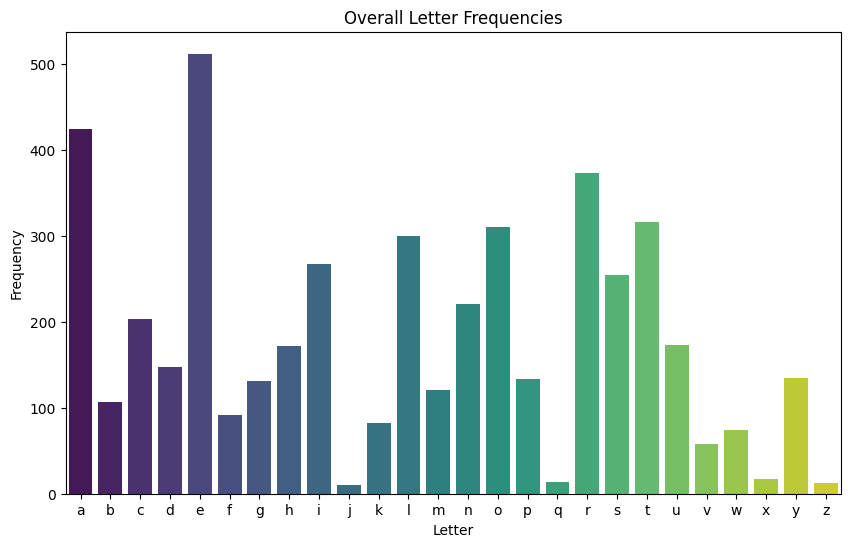

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_letter_freq.index, y='frequency', data=df_letter_freq, palette='viridis')
plt.title('Overall Letter Frequencies')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.show()

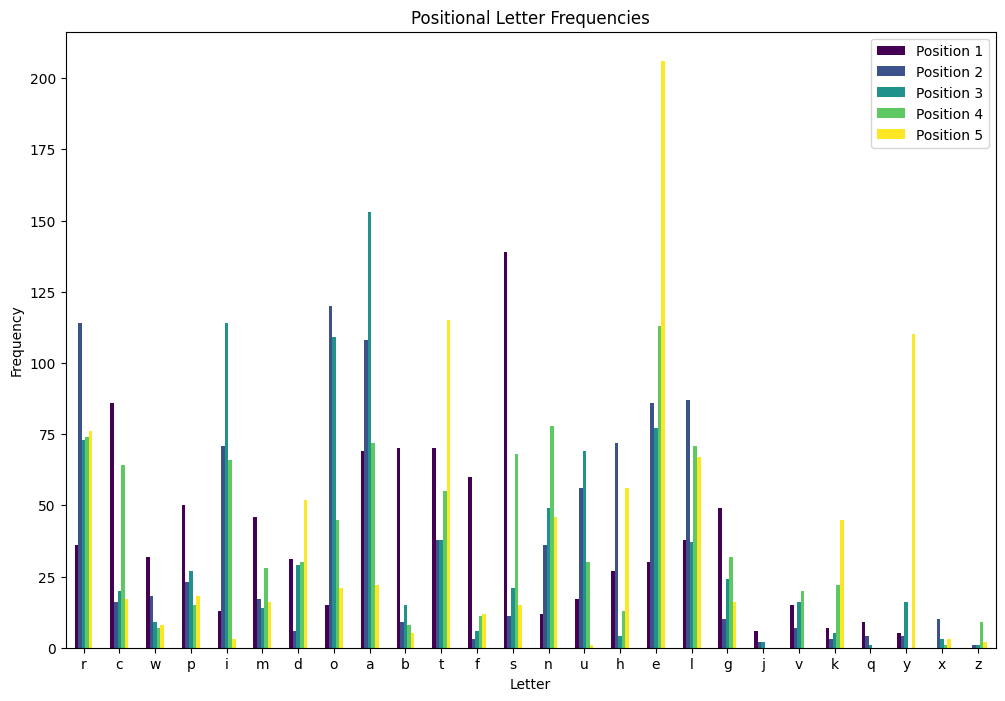

In [9]:
df_positional_freq.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Positional Letter Frequencies')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()